Transfer Learning :
It is a Deep Learning technique where we use a pre-trained model.This pre-trained model is trained for one task and can be re-trained for a similar task with smaller dataset.

When you train a model from Scratch but on smaller dataset you will not achieve high accuracy thus we here using Transfer learning

Transfer Learning gives higher accuracy compared to training models from scratch.

Ex. if you trained a model on image recognisation of face mask but you can use this for dog cat classification too

Examples of Pre-Trained Models(used for image detection):


*   VGG-16
*   ResNet50
*   Inceptionv3
*   MobileNet V2 (light weight)

Workflow :      
Dataset --> Image Preprocessing --> Train Test Split --> Pretrained MobileNet Model

New Image --> MobileNet model trained on dog vs cat data --> Output



# Importing Dataset

In [ ]:
#install the kaggle library
!pip install kaggle

In [ ]:
#configure the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [ ]:
#Kaggle API
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:04<00:00, 183MB/s]
100% 812M/812M [00:04<00:00, 188MB/s]


In [ ]:
#extracting the compressed files
from zipfile import ZipFile
dataset = "dogs-vs-cats.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The Dataset is Extracted")

The Dataset is Extracted


In [ ]:
#extracting the compressed files
from zipfile import ZipFile
dataset2 = "/content/train.zip"

with ZipFile(dataset2, 'r') as zip:
  zip.extractall()
  print("The Dataset is Extracted")

The Dataset is Extracted


In [ ]:
import os

#counting the number of files in train folder

path , dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print('Number of Images : ', file_count)


Number of Images :  25000


Printing the names of images

In [ ]:
file_names = os.listdir("/content/train")
print(file_names)

['dog.12100.jpg', 'dog.6602.jpg', 'dog.6273.jpg', 'cat.2874.jpg', 'cat.4736.jpg', 'dog.9977.jpg', 'dog.2526.jpg', 'dog.10301.jpg', 'dog.4083.jpg', 'cat.4300.jpg', 'cat.6751.jpg', 'dog.8637.jpg', 'cat.2406.jpg', 'cat.6343.jpg', 'cat.1973.jpg', 'cat.852.jpg', 'dog.7521.jpg', 'dog.1501.jpg', 'cat.8264.jpg', 'cat.10170.jpg', 'dog.403.jpg', 'dog.939.jpg', 'dog.12336.jpg', 'cat.61.jpg', 'dog.10617.jpg', 'dog.6158.jpg', 'cat.8967.jpg', 'cat.7722.jpg', 'dog.3393.jpg', 'dog.12412.jpg', 'dog.1090.jpg', 'cat.5367.jpg', 'dog.11124.jpg', 'cat.4221.jpg', 'cat.9079.jpg', 'dog.8731.jpg', 'dog.7891.jpg', 'dog.3958.jpg', 'dog.5845.jpg', 'dog.7622.jpg', 'cat.2217.jpg', 'dog.6646.jpg', 'dog.8347.jpg', 'cat.7146.jpg', 'cat.9712.jpg', 'dog.6077.jpg', 'cat.9894.jpg', 'cat.5288.jpg', 'cat.8073.jpg', 'cat.10654.jpg', 'cat.5459.jpg', 'cat.1402.jpg', 'cat.3811.jpg', 'dog.17.jpg', 'cat.9771.jpg', 'dog.2510.jpg', 'cat.2601.jpg', 'dog.804.jpg', 'cat.5924.jpg', 'dog.6553.jpg', 'dog.6412.jpg', 'cat.6047.jpg', 'dog.58

# Importing the Dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image

# Data Preprocessing

Displaying the Images of Dogs and Cats

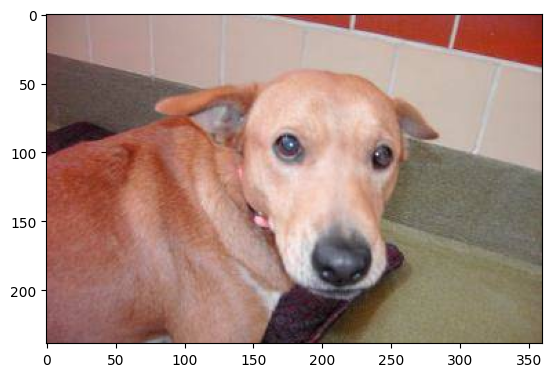

In [ ]:
#display dog imges
img = mpimg.imread("/content/train/dog.1845.jpg")
imgplot = plt.imshow(img)

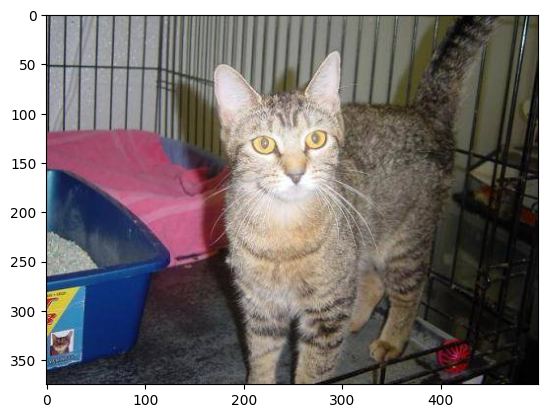

In [ ]:
#display cat imges
img = mpimg.imread("/content/train/cat.1845.jpg")
imgplot = plt.imshow(img)

In [ ]:
#number of dogs and cats images
file_name = os.listdir("/content/train")
dog_count = 0
cat_count = 0
for name in file_name:
  if name.startswith("dog"):
    dog_count += 1
  else:
    cat_count += 1
print("Number of Dogs : ", dog_count)
print("Number of Cats : ", cat_count)

Number of Dogs :  12500
Number of Cats :  12500


In [ ]:
#checking first 5 images class
file_names = os.listdir("/content/train")

for i in range(5):
  name = file_names[i]
  print(name[0:3])

dog
dog
dog
cat
cat


In [ ]:
file_name = os.listdir("/content/train")
x = []
for name in file_name:
  y = int(name[4:-4])
  x.append(y)
x.sort()
print(x)


#   y = list(name)
#   y = y[4:-4]
#   x.append(y)
# x.sort()
# print(x)

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50, 51, 51, 52, 52, 53, 53, 54, 54, 55, 55, 56, 56, 57, 57, 58, 58, 59, 59, 60, 60, 61, 61, 62, 62, 63, 63, 64, 64, 65, 65, 66, 66, 67, 67, 68, 68, 69, 69, 70, 70, 71, 71, 72, 72, 73, 73, 74, 74, 75, 75, 76, 76, 77, 77, 78, 78, 79, 79, 80, 80, 81, 81, 82, 82, 83, 83, 84, 84, 85, 85, 86, 86, 87, 87, 88, 88, 89, 89, 90, 90, 91, 91, 92, 92, 93, 93, 94, 94, 95, 95, 96, 96, 97, 97, 98, 98, 99, 99, 100, 100, 101, 101, 102, 102, 103, 103, 104, 104, 105, 105, 106, 106, 107, 107, 108, 108, 109, 109, 110, 110, 111, 111, 112, 112, 113, 113, 114, 114, 115, 115, 116, 116, 117, 117, 118, 118, 119, 119, 120, 120, 121, 121,

In [ ]:
z = []
for i in range(len(x)):
  if x[i]%2 == 0:
    z.append("dog."+str(x[i])+".jpg")
  else:
    z.append("cat."+str(x[i])+".jpg")
print(z)

['dog.0.jpg', 'dog.0.jpg', 'cat.1.jpg', 'cat.1.jpg', 'dog.2.jpg', 'dog.2.jpg', 'cat.3.jpg', 'cat.3.jpg', 'dog.4.jpg', 'dog.4.jpg', 'cat.5.jpg', 'cat.5.jpg', 'dog.6.jpg', 'dog.6.jpg', 'cat.7.jpg', 'cat.7.jpg', 'dog.8.jpg', 'dog.8.jpg', 'cat.9.jpg', 'cat.9.jpg', 'dog.10.jpg', 'dog.10.jpg', 'cat.11.jpg', 'cat.11.jpg', 'dog.12.jpg', 'dog.12.jpg', 'cat.13.jpg', 'cat.13.jpg', 'dog.14.jpg', 'dog.14.jpg', 'cat.15.jpg', 'cat.15.jpg', 'dog.16.jpg', 'dog.16.jpg', 'cat.17.jpg', 'cat.17.jpg', 'dog.18.jpg', 'dog.18.jpg', 'cat.19.jpg', 'cat.19.jpg', 'dog.20.jpg', 'dog.20.jpg', 'cat.21.jpg', 'cat.21.jpg', 'dog.22.jpg', 'dog.22.jpg', 'cat.23.jpg', 'cat.23.jpg', 'dog.24.jpg', 'dog.24.jpg', 'cat.25.jpg', 'cat.25.jpg', 'dog.26.jpg', 'dog.26.jpg', 'cat.27.jpg', 'cat.27.jpg', 'dog.28.jpg', 'dog.28.jpg', 'cat.29.jpg', 'cat.29.jpg', 'dog.30.jpg', 'dog.30.jpg', 'cat.31.jpg', 'cat.31.jpg', 'dog.32.jpg', 'dog.32.jpg', 'cat.33.jpg', 'cat.33.jpg', 'dog.34.jpg', 'dog.34.jpg', 'cat.35.jpg', 'cat.35.jpg', 'dog.36.jpg

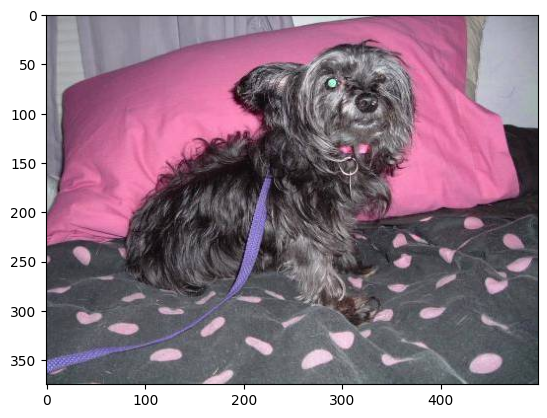

In [ ]:
#display resized dog imges
img = mpimg.imread("/content/train/dog.0.jpg")
imgplot = plt.imshow(img)

In [ ]:
#creating a directory for resized images
os.mkdir('/content/resized_images2')

In [ ]:
resized_folder2 = "/content/resized_images2"

In [ ]:
for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + "/" + filename
  img = Image.open(img_path)
  img = img.resize((224,224))  #mobilenet needs 224,224
  img = img.convert('RGB')
  img.save(resized_folder + "/" + filename)

Resizing all the images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/resized_images')

FileExistsError: [Errno 17] File exists: '/content/resized_images'

In [ ]:
original_folder = "/content/train"
resized_folder = "/content/resized_images"

In [ ]:
for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + "/" + filename
  img = Image.open(img_path)
  img = img.resize((224,224))  #mobilenet needs 224,224
  img = img.convert('RGB')
  img.save(resized_folder + "/" + filename)

In [ ]:
#counting the number of files in train folder

path , dirs, files = next(os.walk("/content/resized_images"))
file_count_resized = len(files)
print('Number of Images : ', file_count_resized)

Number of Images :  2000


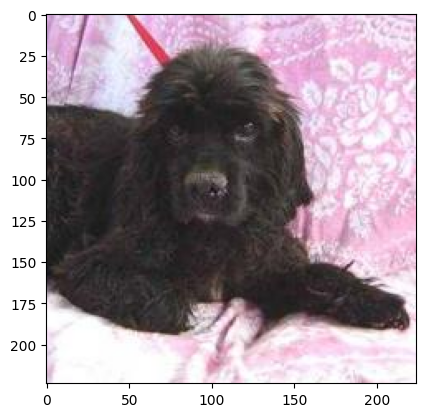

In [ ]:
#display resized dog imges
img = mpimg.imread("/content/resized_images/dog.12100.jpg")
imgplot = plt.imshow(img)

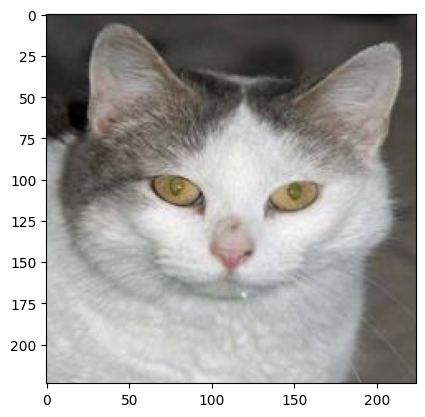

In [ ]:
#display cat imges
img = mpimg.imread("/content/resized_images/cat.4736.jpg")
imgplot = plt.imshow(img)

Creating Labels for resized images of dogs & cats

Dogs -->  0

Cats -->  1

In [ ]:
#creating a for loop to assign lables
file_names = os.listdir("/content/resized_images")

labels = []

for i in range(2000):
  filename = file_names[i]
  if filename.startswith("dog"):
    labels.append(0)
  else:
    labels.append(1)

In [ ]:
print(file_names)

['dog.12100.jpg', 'dog.6602.jpg', 'dog.6273.jpg', 'cat.2874.jpg', 'cat.4736.jpg', 'dog.9977.jpg', 'dog.2526.jpg', 'dog.10301.jpg', 'dog.4083.jpg', 'cat.4300.jpg', 'cat.6751.jpg', 'dog.8637.jpg', 'cat.2406.jpg', 'cat.6343.jpg', 'cat.1973.jpg', 'cat.852.jpg', 'dog.7521.jpg', 'dog.1501.jpg', 'cat.8264.jpg', 'cat.10170.jpg', 'dog.403.jpg', 'dog.939.jpg', 'dog.12336.jpg', 'cat.61.jpg', 'dog.10617.jpg', 'dog.6158.jpg', 'cat.8967.jpg', 'cat.7722.jpg', 'dog.3393.jpg', 'dog.12412.jpg', 'dog.1090.jpg', 'cat.5367.jpg', 'dog.11124.jpg', 'cat.4221.jpg', 'cat.9079.jpg', 'dog.8731.jpg', 'dog.7891.jpg', 'dog.3958.jpg', 'dog.5845.jpg', 'dog.7622.jpg', 'cat.2217.jpg', 'dog.6646.jpg', 'dog.8347.jpg', 'cat.7146.jpg', 'cat.9712.jpg', 'dog.6077.jpg', 'cat.9894.jpg', 'cat.5288.jpg', 'cat.8073.jpg', 'cat.10654.jpg', 'cat.5459.jpg', 'cat.1402.jpg', 'cat.3811.jpg', 'dog.17.jpg', 'cat.9771.jpg', 'dog.2510.jpg', 'cat.2601.jpg', 'dog.804.jpg', 'cat.5924.jpg', 'dog.6553.jpg', 'dog.6412.jpg', 'cat.6047.jpg', 'dog.58

In [ ]:
print(labels)

[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 

In [ ]:
print(len(file_names), len(labels))

2000 2000


In [ ]:
#counting the images of dogs and cats in resized images
values , counts = np.unique(labels, return_counts = True)
print(values, counts)

[0 1] [ 984 1016]


Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = "/content/resized_images"
image_list = glob.glob(image_directory + "/*.jpg")   # image_extension = ['png','jpg']

image_extensions = ['png','jpg']

files = []

[files.extend(glob.glob(image_directory + "/*." + ext)) for ext in image_extensions]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[234 182 229]
   [229 178 222]
   [225 176 220]
   ...
   [222 190 231]
   [223 191 232]
   [220 188 229]]

  [[230 178 225]
   [222 171 215]
   [209 160 204]
   ...
   [225 194 233]
   [230 199 238]
   [230 199 238]]

  [[232 180 227]
   [223 172 216]
   [205 156 200]
   ...
   [251 222 255]
   [252 223 255]
   [250 221 254]]

  ...

  [[222 203 220]
   [224 205 222]
   [220 203 217]
   ...
   [252 248 253]
   [255 252 255]
   [255 253 255]]

  [[224 205 220]
   [229 211 224]
   [228 211 224]
   ...
   [255 249 254]
   [255 251 255]
   [255 253 255]]

  [[224 206 219]
   [232 214 227]
   [234 218 229]
   ...
   [255 249 254]
   [255 250 255]
   [255 250 255]]]


 [[[ 41  43  53]
   [ 41  43  53]
   [ 41  43  53]
   ...
   [ 44  49  58]
   [ 46  51  60]
   [ 48  53  62]]

  [[ 41  43  53]
   [ 41  43  53]
   [ 41  43  53]
   ...
   [ 44  49  58]
   [ 46  51  60]
   [ 47  52  61]]

  [[ 41  43  53]
   [ 41  43  53]
   [ 41  43  53]
   ...
   [ 45  50  59]
   [ 45  50  59]
   [ 45  50

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X_train.shape , X_test.shape , X.shape)

(1600, 224, 224, 3) (400, 224, 224, 3) (2000, 224, 224, 3)


1600 --> Training Data

400 --> Testing Data

In [ ]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.2745098  0.40784314 0.52156863]
   [0.25882353 0.38823529 0.49019608]
   [0.29019608 0.41176471 0.50196078]
   ...
   [0.27843137 0.47843137 0.54117647]
   [0.2627451  0.4627451  0.5254902 ]
   [0.25490196 0.45490196 0.51764706]]

  [[0.27843137 0.40784314 0.50980392]
   [0.28235294 0.40392157 0.50196078]
   [0.32941176 0.44313725 0.5254902 ]
   ...
   [0.29411765 0.49411765 0.55686275]
   [0.29019608 0.49019608 0.55294118]
   [0.28235294 0.48235294 0.54509804]]

  [[0.33333333 0.45490196 0.54509804]
   [0.2627451  0.37647059 0.45882353]
   [0.22352941 0.3254902  0.39215686]
   ...
   [0.33333333 0.53333333 0.59607843]
   [0.32941176 0.52941176 0.59215686]
   [0.32156863 0.52156863 0.58431373]]

  ...

  [[0.0745098  0.09411765 0.42745098]
   [0.0745098  0.09411765 0.42745098]
   [0.0745098  0.09411765 0.42745098]
   ...
   [0.14901961 0.16078431 0.21568627]
   [0.14509804 0.15294118 0.19607843]
   [0.14117647 0.14901961 0.19215686]]

  [[0.08235294 0.09803922 0.44313725]
   [0.0

Building the Neural Network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_v2_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model = hub.KerasLayer(mobilenet_v2_model, input_shape = (224,224,3), trainable = False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ["accuracy"]
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs = 8)

Epoch 1/8
50/50 [==============================] - 9s 48ms/step - loss: 0.1749 - accuracy: 0.9287
Epoch 2/8
50/50 [==============================] - 2s 44ms/step - loss: 0.0630 - accuracy: 0.9794
Epoch 3/8
50/50 [==============================] - 2s 39ms/step - loss: 0.0446 - accuracy: 0.9881
Epoch 4/8
50/50 [==============================] - 2s 39ms/step - loss: 0.0355 - accuracy: 0.9881
Epoch 5/8
50/50 [==============================] - 2s 39ms/step - loss: 0.0275 - accuracy: 0.9944
Epoch 6/8
50/50 [==============================] - 2s 39ms/step - loss: 0.0215 - accuracy: 0.9981
Epoch 7/8
50/50 [==============================] - 2s 40ms/step - loss: 0.0188 - accuracy: 0.9975
Epoch 8/8
50/50 [==============================] - 2s 44ms/step - loss: 0.0168 - accuracy: 0.9981


In [ ]:
score ,accuracy = model.evaluate(X_test_scaled, Y_test)
print('test Loss : ', score)
print("Test Accuracy : ", accuracy)

13/13 [==============================] - 2s 115ms/step - loss: 0.0782 - accuracy: 0.9725
test Loss :  0.07815676927566528
Test Accuracy :  0.9725000262260437


Building a Predictive System

Path of the image to be predicted : /content/cat_img.jpeg


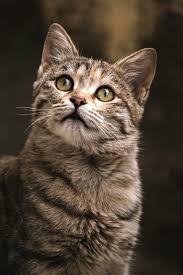

1/1 [==============================] - 1s 1s/step
[[-6.1059203  3.9987803]]
1
The image contains Cat


In [ ]:
input_img_path = input('Path of the image to be predicted : ')
input_img = cv2.imread(input_img_path)
cv2_imshow(input_img)

input_img_resize = cv2.resize(input_img, (224,224))
input_img_scaled = input_img_resize/255

image_reshaped = np.reshape(input_img_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print("The image contains Dog")
else:
  print("The image contains Cat")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/My Drive/path_to_save_model')

Mounted at /content/drive


In [ ]:
# Save the model
model.save('dog_cat_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
